In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
import seaborn as sns


In [ ]:
df['Outcome'] = np.where(df['Outcome'] == 1, "Diabetic", "Not Diabetic")


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Not Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Not Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


C:\Users\1142s\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


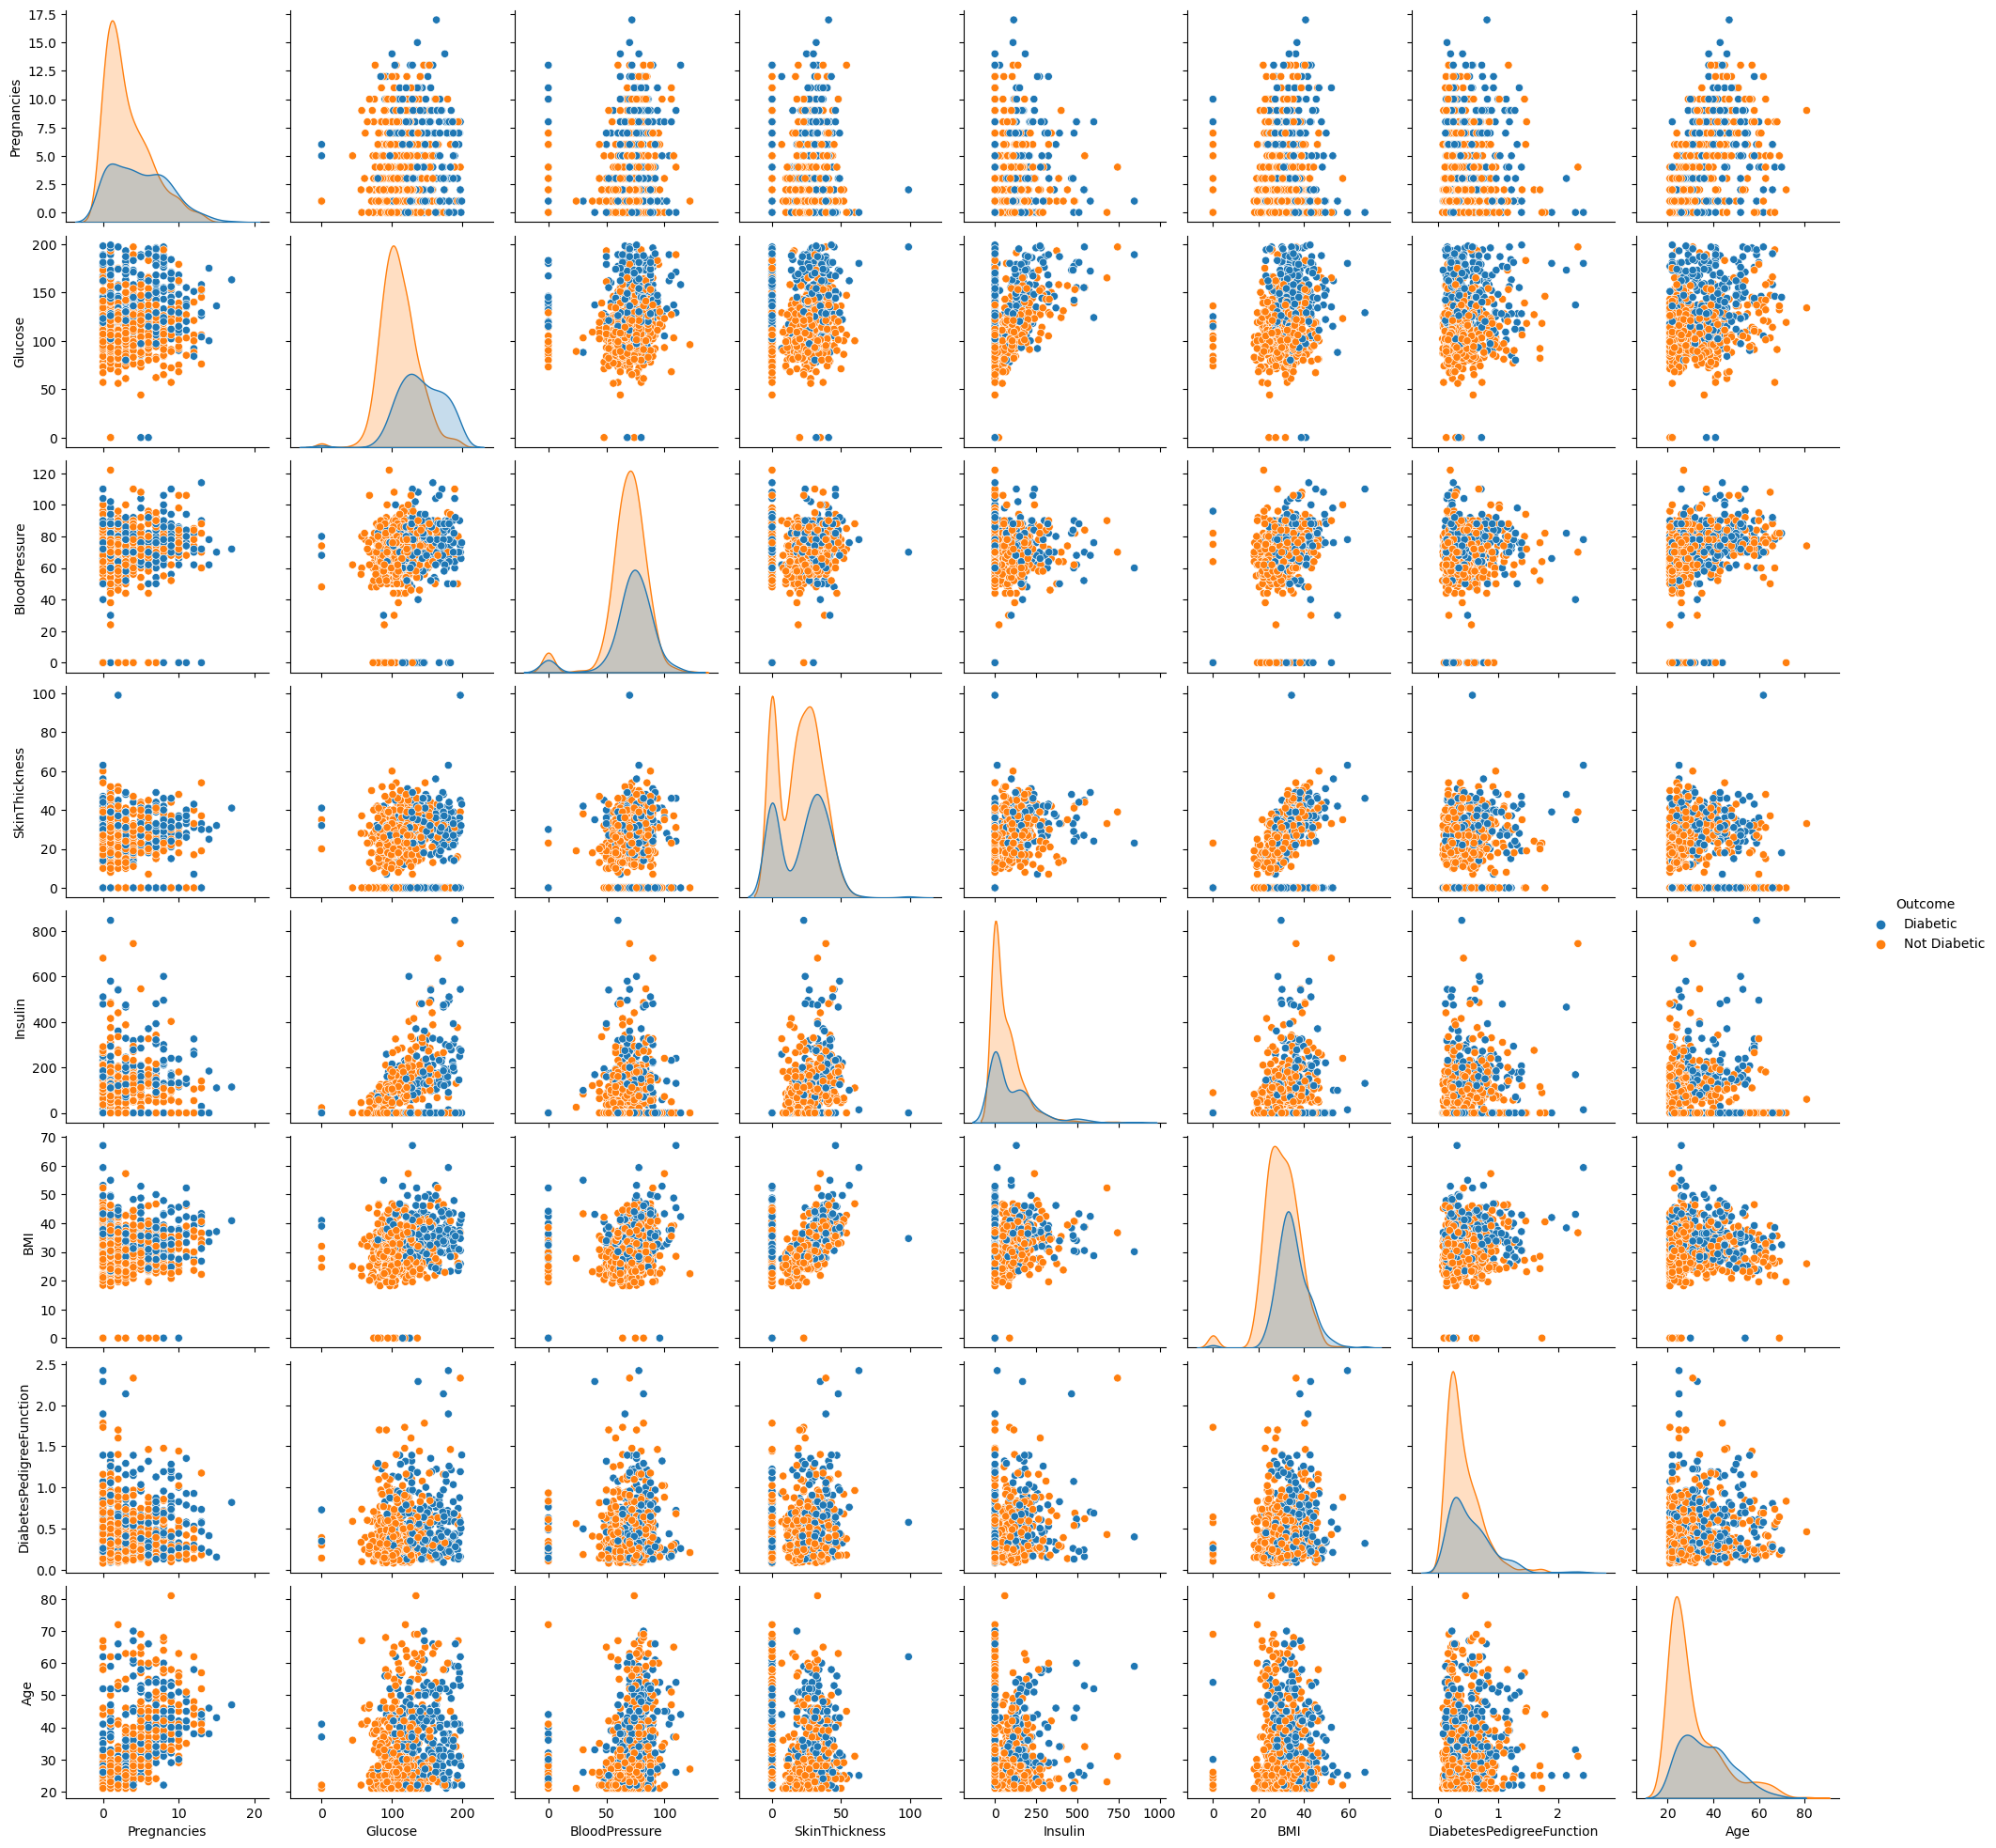

In [ ]:
sns.pairplot(df, hue = "Outcome")

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
## Creating tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [ ]:
df.shape


(768, 9)

In [ ]:
### Creating Model with PyTorch

class ANN_MODEL(nn.Module):
    def __init__(self, in_features = 8, hidden1 = 20,hidden2 = 20, out_features = 2):
        super().__init__()
        self.f_connected1 = nn.Linear(in_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x
    
    

In [ ]:
torch.manual_seed(20)
model = ANN_MODEL()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_MODEL(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
## Define loss function, optimiser
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
y_train = y_train.long()


In [ ]:
epochs = 500
final_losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if (i+1) % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i, loss.item()))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch number: 0 and the loss : 3.4572105407714844
Epoch number: 10 and the loss : 0.8019207119941711
Epoch number: 20 and the loss : 0.6090320944786072
Epoch number: 30 and the loss : 0.5917770266532898
Epoch number: 40 and the loss : 0.5679707527160645
Epoch number: 50 and the loss : 0.5529041886329651
Epoch number: 60 and the loss : 0.5410094857215881
Epoch number: 70 and the loss : 0.5310389995574951
Epoch number: 80 and the loss : 0.5220361351966858
Epoch number: 90 and the loss : 0.5135971903800964
Epoch number: 100 and the loss : 0.5061255097389221
Epoch number: 110 and the loss : 0.4983411133289337
Epoch number: 120 and the loss : 0.4960549771785736
Epoch number: 130 and the loss : 0.4828636944293976
Epoch number: 140 and the loss : 0.4756036400794983
Epoch number: 150 and the loss : 0.4799239933490753
Epoch number: 160 and the loss : 0.4792904853820801
Epoch number: 170 and the loss : 0.4650001525878906
Epoch number: 180 and the loss : 0.4582013487815857
Epoch number: 190 and t

Text(0.5, 0, 'Epochs')

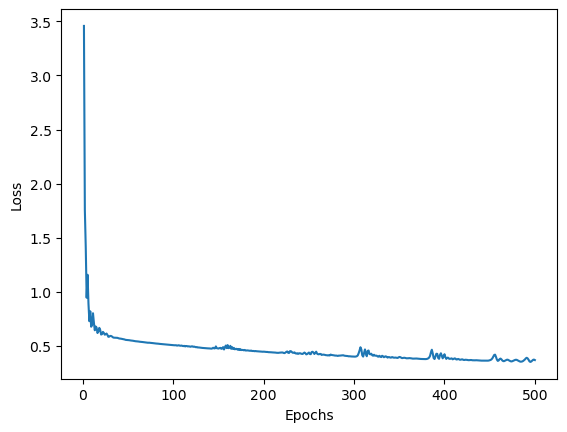

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the list of tensors to NumPy arrays
final_losses_np = [loss.detach().numpy() for loss in final_losses]

plt.plot(range(1, epochs + 1), final_losses_np)
plt.ylabel('Loss')
plt.xlabel('Epochs')


In [ ]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = (model(data))
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
1
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [ ]:
y_pred


tensor([1.4679, 0.0860])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[89, 18],
       [13, 34]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

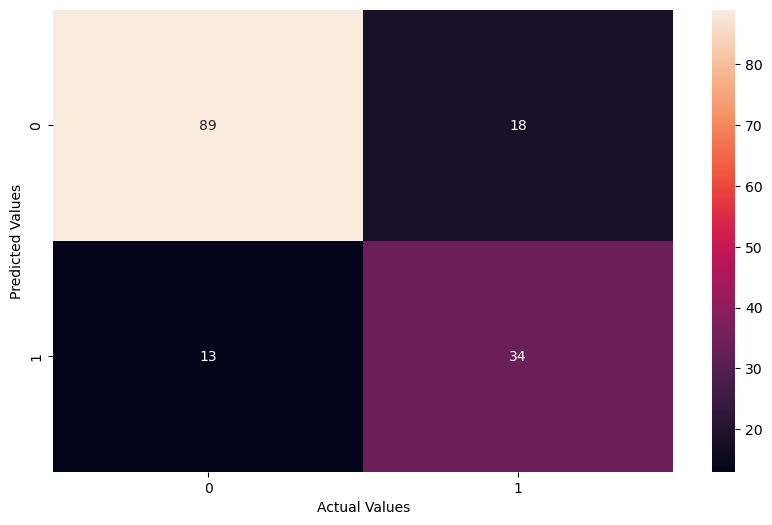

In [ ]:
plt.figure(figsize = (10 , 6))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7987012987012987

In [ ]:
### Save the model
torch.save(model, 'diabetes.pt')

In [ ]:
model = torch.load('diabetes.pt')

In [ ]:
model.eval()

ANN_MODEL(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:
### Prediction of new datapoints
list(df.iloc[0,:-1])


[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [ ]:
list1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 47.0]

In [ ]:
new_data = torch.tensor(list1)

In [ ]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.1258, 1.2845])
1
